## Detection (Yolov5) on BDD-100k-Dataset

For prediction benchmarking YOLO uses `mAP`, some of the attribites of `mAP` are following:
* It uses both `precision` and `recall` to get final `mAP` - that makes it suited for imabalanced dataset.
* Yolo also provides per-class `mAP` so we can check if there is any bias.

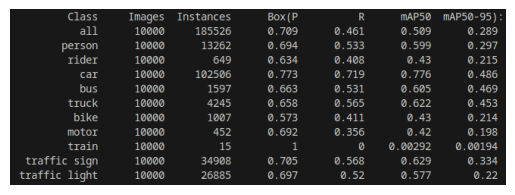

In [1]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/map_yolo.png")
plt.axis("off")
plt.imshow(im)

We see in above table model performing well for the majority classes at the same time its not doing very poor on the minority classes, except for the `train-class` which does not have much training samples.

### Co-relation between no of samples and mAP or a class

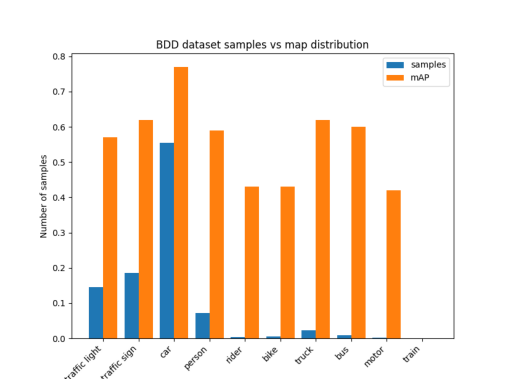

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/sample_map_dist.png")
plt.axis("off")
plt.imshow(im)

From above plot we can see that the models performance is following no of samples in training, at the same time its doing much better on minority class, except for train, which has almost no data samples.

### Prediction on Day Vs night dataset

* below data has been genererated by resoding `mAP50` using evaluations script provided in `source/evaluation.py`

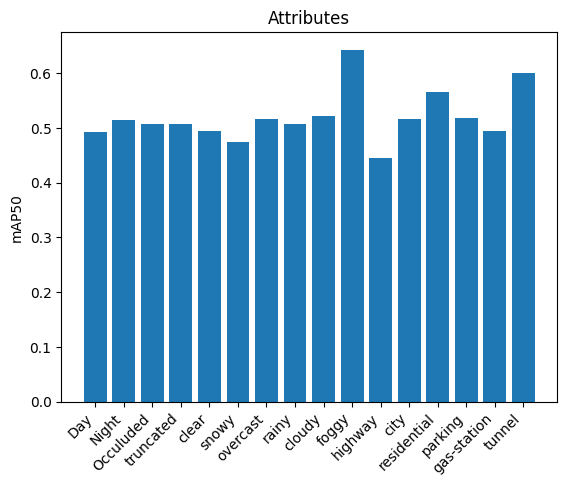

In [44]:
from matplotlib import pyplot as plt

map_day_night = {
    'day': [0.492, 0.393],
    'night': [0.514, 0.607],
    "occuluded": [],
    "trucated": []
}

classes = ["Day", "Night", "Occuluded", "truncated", "clear", 
           "snowy", "overcast", "rainy", "cloudy", "foggy", 
           "highway", "city", "residential", "parking", "gas-station",
           "tunnel"]
maps = [0.492, 0.514, 0.508, 0.508, 0.495, 0.475, 0.517, 0.508, 
        0.522, 0.643, 0.446, 0.516, 0.565, 0.519, 0.494, 0.601]

fig, ax = plt.subplots()
ax.bar(classes, maps)
ax.set_ylabel("mAP50")
ax.set_title("Attributes")
plt.xticks(rotation=45, ha="right")
plt.show()